<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1

In [9]:
# Display basic information about the dataset
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [10]:
# Display the first few rows of the dataset
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [11]:
# Display basic descriptive statistics
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


#### Task 2

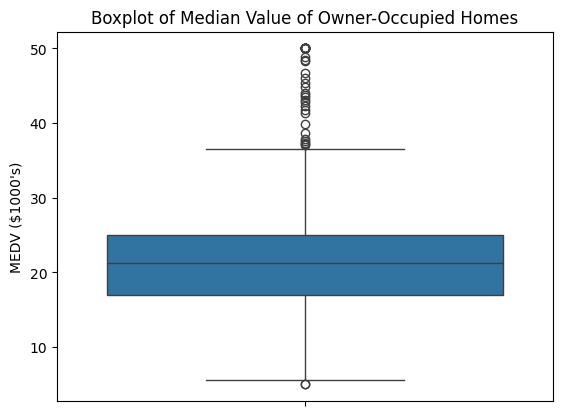

In [15]:
# Boxplot for MEDV
sns.boxplot(data=boston_df, y='MEDV')
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('MEDV ($1000\'s)')
pyplot.show()

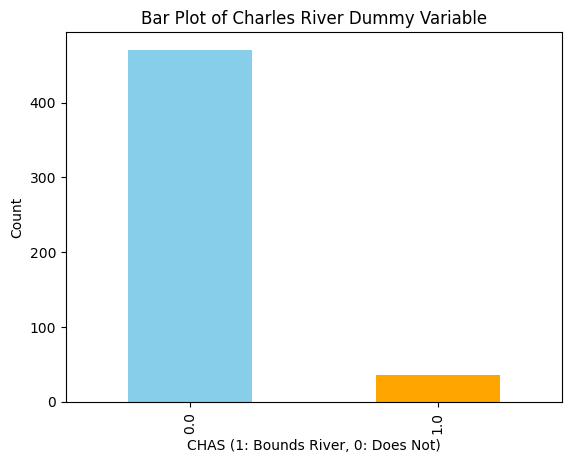

In [20]:
# Bar plot for CHAS
chas_counts = boston_df['CHAS'].value_counts()
chas_counts.plot(kind='bar', color=['skyblue', 'orange'])
pyplot.title('Bar Plot of Charles River Dummy Variable')
pyplot.xlabel('CHAS (1: Bounds River, 0: Does Not)')
pyplot.ylabel('Count')
pyplot.show()

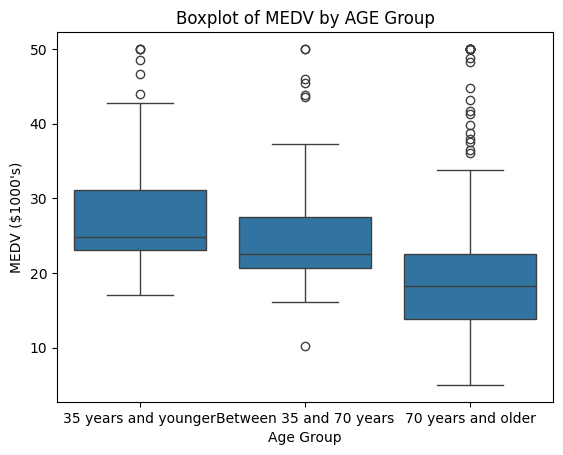

In [17]:
# Create age groups
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'Between 35 and 70 years', '70 years and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

# Boxplot for MEDV vs AGE_Group
sns.boxplot(data=boston_df, x='AGE_Group', y='MEDV')
pyplot.title('Boxplot of MEDV by AGE Group')
pyplot.xlabel('Age Group')
pyplot.ylabel('MEDV ($1000\'s)')
pyplot.show()

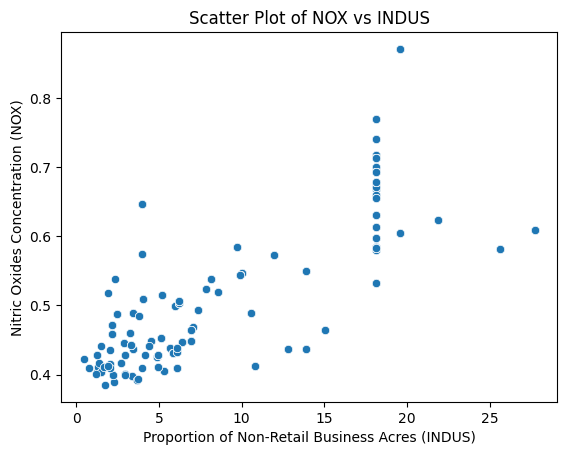

In [19]:
# Scatter plot for NOX vs INDUS
sns.scatterplot(data=boston_df, x='INDUS', y='NOX')
pyplot.title('Scatter Plot of NOX vs INDUS')
pyplot.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.ylabel('Nitric Oxides Concentration (NOX)')
pyplot.show()

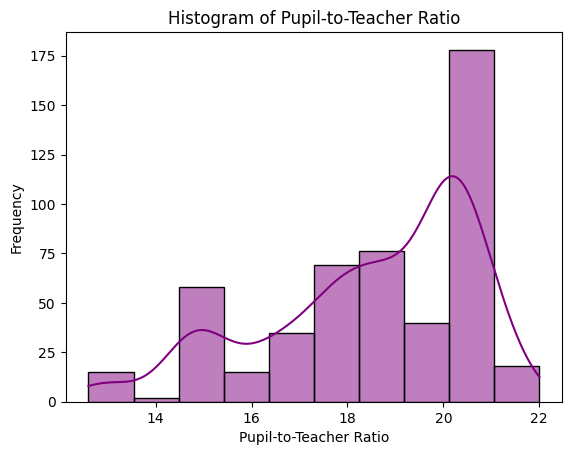

In [21]:
# Histogram for PTRATIO
sns.histplot(data=boston_df, x='PTRATIO', bins=10, kde=True, color='purple')
pyplot.title('Histogram of Pupil-to-Teacher Ratio')
pyplot.xlabel('Pupil-to-Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

#### Task 3

## 1. T-Test: Difference in Median Value of Homes (MEDV) Near the Charles River
- **Hypotheses**:
  - \( H_0 \): There is no significant difference in `MEDV` for homes bounded by the Charles River (`CHAS=1`) vs those not (`CHAS=0`).
  - \( H_a \): There is a significant difference.

- **Result**:  
  - \( T \)-Statistic: 3.1133  
  - \( P \)-Value: 0.0036  

- **Conclusion**:  
  Since the \( p \)-value (0.0036) is less than the significance level \( \alpha = 0.05 \), we reject \( H_0 \).  
  There is a statistically significant difference in the median value of homes near the Charles River compared to those not near it.

In [23]:
# Perform t-test
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = scipy.stats.ttest_ind(chas_1, chas_0, equal_var=False)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: 3.113291312794837, P-Value: 0.003567170098137517


## 2. ANOVA: Difference in MEDV Across Age Groups
- **Hypotheses**:
  - \( H_0 \): The mean `MEDV` is equal across all age groups.
  - \( H_a \): At least one age group has a different mean.

- **Result**:  
  - \( F \)-Statistic: 36.4077  
  - \( P \)-Value: \( 1.71 \times 10^{-15} \)  

- **Conclusion**:  
  Since the \( p \)-value is much smaller than \( \alpha = 0.05 \), we reject \( H_0 \).  
  There is a statistically significant difference in the median value of homes across the three age groups. A post-hoc analysis (e.g., Tukey's test) could be performed to identify which groups differ significantly.

In [24]:
# ANOVA test
anova_result = ols('MEDV ~ AGE_Group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)

print(anova_table)

                 sum_sq     df         F        PR(>F)
AGE_Group   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN


## 3. Pearson Correlation: Relationship Between NOX and INDUS
- **Hypotheses**:
  - \( H_0 \): There is no correlation between `NOX` and `INDUS`.
  - \( H_a \): There is a significant correlation.

- **Result**:  
  - Correlation coefficient: 0.7637  
  - \( P \)-Value: \( 7.91 \times 10^{-98} \)  

- **Conclusion**:  
  The correlation coefficient of 0.7637 indicates a strong positive linear relationship between `NOX` and `INDUS`.  
  Since the \( p \)-value is much smaller than \( \alpha = 0.05 \), the correlation is statistically significant.

In [25]:
# Pearson correlation
corr, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation: {corr}, P-Value: {p_value}")

Correlation: 0.7636514469209192, P-Value: 7.913361061210442e-98


## 4. Regression: Impact of Weighted Distance (DIS) on MEDV
- **Hypotheses**:
  - \( H_0 \): `DIS` has no impact on `MEDV` (coefficient of `DIS` = 0).
  - \( H_a \): `DIS` has a significant impact on `MEDV` (coefficient of `DIS` ≠ 0).

- **Result**:  
  - Coefficient for `DIS`: 1.0916  
  - \( P \)-Value for `DIS`: 0.000  
  - \( R^2 \): 0.062  

- **Conclusion**:  
  The \( p \)-value for the `DIS` coefficient is less than \( \alpha = 0.05 \), so we reject \( H_0 \).  
  An increase of one unit in `DIS` (weighted distance to employment centers) is associated with an increase of $1,091.60 in the median home value (`MEDV`).  
  However, the \( R^2 \) value (0.062) indicates that only 6.2% of the variance in `MEDV` is explained by `DIS`. This suggests that other factors are influencing `MEDV`.

In [26]:
# Regression analysis
regression_result = ols('MEDV ~ DIS', data=boston_df).fit()

print(regression_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 23 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        11:47:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0